In [26]:
import pandas as pd

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [27]:
metabolomics = pd.read_csv("./CCLE_metabolomics_20190502.csv")

In [28]:
metabolomics.head()

,CCLE_ID,DepMap_ID,2-aminoadipate,3-phosphoglycerate,alpha-glycerophosphate,4-pyridoxate,aconitate,adenine,adipate,alpha-ketoglutarate,...,C56:8 TAG,C56:7 TAG,C56:6 TAG,C56:5 TAG,C56:4 TAG,C56:3 TAG,C56:2 TAG,C58:8 TAG,C58:7 TAG,C58:6 TAG
0,DMS53_LUNG,ACH-000698,6.112727,6.034198,5.896896,6.000532,5.513618,5.868529,5.977177,5.693074,...,6.070239,6.133433,6.091089,6.257711,6.372732,6.202511,5.939576,6.309821,6.115974,5.999436
1,SW1116_LARGE_INTESTINE,ACH-000489,5.577413,5.727045,5.111468,6.073250,5.802494,5.824473,5.888821,5.768379,...,6.248653,6.633575,6.378052,6.341043,6.360945,6.333540,6.137271,7.065858,6.832174,6.363064
2,NCIH1694_LUNG,ACH-000431,5.886398,5.574881,5.541259,5.848375,5.665026,5.875548,5.894904,5.839640,...,5.942887,5.946988,5.837980,5.913350,6.137530,5.807546,5.704149,5.881193,5.785208,5.504225
3,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,ACH-000707,5.770030,6.099229,6.233259,5.543495,5.767759,6.155905,6.111148,5.949481,...,6.516922,6.113791,6.282113,6.248667,6.109480,6.043570,5.846802,6.429402,5.779815,6.241530
4,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,ACH-000509,5.480683,5.469742,6.509397,6.251005,5.190578,5.897085,6.148333,5.607481,...,6.161981,6.777932,6.676390,6.695659,6.751029,6.385056,6.682612,6.757899,6.728570,6.879260


In [29]:
metabolomics["ID"] = metabolomics["CCLE_ID"].apply(lambda x: x.split("_")[0])

In [30]:
metabolomics.head()

,CCLE_ID,DepMap_ID,2-aminoadipate,3-phosphoglycerate,alpha-glycerophosphate,4-pyridoxate,aconitate,adenine,adipate,alpha-ketoglutarate,...,C56:7 TAG,C56:6 TAG,C56:5 TAG,C56:4 TAG,C56:3 TAG,C56:2 TAG,C58:8 TAG,C58:7 TAG,C58:6 TAG,ID
0,DMS53_LUNG,ACH-000698,6.112727,6.034198,5.896896,6.000532,5.513618,5.868529,5.977177,5.693074,...,6.133433,6.091089,6.257711,6.372732,6.202511,5.939576,6.309821,6.115974,5.999436,DMS53
1,SW1116_LARGE_INTESTINE,ACH-000489,5.577413,5.727045,5.111468,6.073250,5.802494,5.824473,5.888821,5.768379,...,6.633575,6.378052,6.341043,6.360945,6.333540,6.137271,7.065858,6.832174,6.363064,SW1116
2,NCIH1694_LUNG,ACH-000431,5.886398,5.574881,5.541259,5.848375,5.665026,5.875548,5.894904,5.839640,...,5.946988,5.837980,5.913350,6.137530,5.807546,5.704149,5.881193,5.785208,5.504225,NCIH1694
3,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,ACH-000707,5.770030,6.099229,6.233259,5.543495,5.767759,6.155905,6.111148,5.949481,...,6.113791,6.282113,6.248667,6.109480,6.043570,5.846802,6.429402,5.779815,6.241530,P3HR1
4,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,ACH-000509,5.480683,5.469742,6.509397,6.251005,5.190578,5.897085,6.148333,5.607481,...,6.777932,6.676390,6.695659,6.751029,6.385056,6.682612,6.757899,6.728570,6.879260,HUT78


In [31]:
matplotlib.rcParams['figure.figsize'] = [8, 10]

In [32]:
celllines_mutations = pd.read_csv("../../../../GEMICCL/Mutation.csv", sep = "\t")

<ipython-input-32-7957ff841ed2>:1: DtypeWarning: Columns (4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  celllines_mutations = pd.read_csv("../../../../GEMICCL/Mutation.csv", sep = "\t")


In [88]:
celllines_mutations["CellLine"] = celllines_mutations["CellLineName_Cellosaurus"].apply(lambda x: x.replace("-", ""))

In [90]:
celllines_mutations[celllines_mutations["CellLine"]== "HT1080"].sort_values(by = "HGNC")

,Source_Type,CellLineName_Cellosaurus,HGNC,Entrez,Chr,Chr_Start,Chr_End,Strand,CDS_Mutation,AA_Mutation,MutationType_Raw,MutationType,Mutation_Zygosity,CellLine
66502,CCLE,HT-1080,AAK1,22848.0,2,69741754,69741756,+,c.1623_1625delACA,p.541_542QQ>Q,In_Frame_Del,In_Frame,NaN,HT1080
780196,COSMIC,HT-1080,AARS2,57505.0,6,44279212,44279212,-,c.496A>T,p.R166W,Substitution - Missense,Missense,Heterozygous,HT1080
464815,COSMIC,HT-1080,ACTG1,71.0,17,79479021,79479023,-,c.269_271delTCT,p.F90delF,Deletion - In frame,In_Frame,Heterozygous,HT1080
362230,COSMIC,HT-1080,ADAM15,8751.0,1,155030595,155030595,+,c.1685G>A,p.R562H,Substitution - Missense,Missense,Heterozygous,HT1080
477446,COSMIC,HT-1080,ADAM17,6868.0,2,9630576,9630576,-,c.2205T>G,p.T735T,Substitution - coding silent,Silent,Heterozygous,HT1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539957,COSMIC,HT-1080,ZBTB46,140685.0,20,62378531,62378531,-,c.1522G>A,p.G508S,Substitution - Missense,Missense,Heterozygous,HT1080
394579,COSMIC,HT-1080,ZDHHC18,84243.0,1,27180278,27180278,+,c.1111G>T,p.D371Y,Substitution - Missense,Missense,Heterozygous,HT1080
463915,COSMIC,HT-1080,ZNF521,25925.0,18,22807032,22807032,-,c.850G>A,p.V284I,Substitution - Missense,Missense,Heterozygous,HT1080
434543,COSMIC,HT-1080,ZNF536,9745.0,19,30934479,30934479,+,c.10G>A,p.A4T,Substitution - Missense,Missense,Heterozygous,HT1080


In [91]:
celllines_list = metabolomics["ID"].unique().tolist()
celllines_notinmutationset = set(celllines_list) - set(celllines_mutations['CellLine'])
celllines_mapped_mutations = metabolomics[~metabolomics["ID"].isin(celllines_notinmutationset)]

In [92]:
celllines_mapped_mutations.head()

,CCLE_ID,DepMap_ID,2-aminoadipate,3-phosphoglycerate,alpha-glycerophosphate,4-pyridoxate,aconitate,adenine,adipate,alpha-ketoglutarate,...,C56:7 TAG,C56:6 TAG,C56:5 TAG,C56:4 TAG,C56:3 TAG,C56:2 TAG,C58:8 TAG,C58:7 TAG,C58:6 TAG,ID
1,SW1116_LARGE_INTESTINE,ACH-000489,5.577413,5.727045,5.111468,6.073250,5.802494,5.824473,5.888821,5.768379,...,6.633575,6.378052,6.341043,6.360945,6.333540,6.137271,7.065858,6.832174,6.363064,SW1116
2,NCIH1694_LUNG,ACH-000431,5.886398,5.574881,5.541259,5.848375,5.665026,5.875548,5.894904,5.839640,...,5.946988,5.837980,5.913350,6.137530,5.807546,5.704149,5.881193,5.785208,5.504225,NCIH1694
3,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,ACH-000707,5.770030,6.099229,6.233259,5.543495,5.767759,6.155905,6.111148,5.949481,...,6.113791,6.282113,6.248667,6.109480,6.043570,5.846802,6.429402,5.779815,6.241530,P3HR1
5,UMUC3_URINARY_TRACT,ACH-000522,5.892011,6.039330,6.309562,5.645860,5.501537,5.975171,5.907445,5.180048,...,6.472323,6.298740,6.348706,6.211220,6.492331,6.770051,6.176431,6.353418,6.320354,UMUC3
6,HOS_BONE,ACH-000613,6.234494,6.072933,6.123578,5.509110,6.236506,6.031743,5.927760,6.057326,...,5.417065,5.507133,5.514527,5.634411,5.713458,5.414780,5.345226,5.149174,5.521381,HOS


In [39]:
averaged = metabolomics.T
averaged.columns = averaged.loc["ID"]

In [40]:
averaged

ID,DMS53,SW1116,NCIH1694,P3HR1,HUT78,UMUC3,HOS,HUNS1,AML193,RVH421,...,HOP62,EKVX,OVCAR5,UO31,TK10,SF268,SF539,SNB75,HOP92,MUTZ3
CCLE_ID,DMS53_LUNG,SW1116_LARGE_INTESTINE,NCIH1694_LUNG,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,UMUC3_URINARY_TRACT,HOS_BONE,HUNS1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,RVH421_SKIN,...,HOP62_LUNG,EKVX_LUNG,OVCAR5_OVARY,UO31_KIDNEY,TK10_KIDNEY,SF268_CENTRAL_NERVOUS_SYSTEM,SF539_CENTRAL_NERVOUS_SYSTEM,SNB75_CENTRAL_NERVOUS_SYSTEM,HOP92_LUNG,MUTZ3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
DepMap_ID,ACH-000698,ACH-000489,ACH-000431,ACH-000707,ACH-000509,ACH-000522,ACH-000613,ACH-000829,ACH-000557,ACH-000614,...,ACH-000861,ACH-000706,ACH-001151,ACH-000428,ACH-001208,ACH-000655,ACH-000273,ACH-000504,ACH-000825,ACH-000084
2-aminoadipate,6.112727,5.577413,5.886398,5.77003,5.480683,5.892011,6.234494,5.972748,6.041394,6.081218,...,5.923901,5.703092,5.909718,6.095599,5.875201,5.977636,5.957233,5.967707,5.962415,6.332344
3-phosphoglycerate,6.034198,5.727045,5.574881,6.099229,5.469742,6.03933,6.072933,5.523737,5.474501,6.080584,...,6.067542,5.751252,5.823581,6.052813,6.056904,6.026483,6.090834,5.931487,5.99264,5.812531
alpha-glycerophosphate,5.896896,5.111468,5.541259,6.233259,6.509397,6.309562,6.123578,5.826709,6.767043,6.109159,...,5.969476,5.418494,5.557201,5.894046,5.831128,6.480536,5.323475,5.620542,6.296222,5.44633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C56:2 TAG,5.939576,6.137271,5.704149,5.846802,6.682612,6.770051,5.41478,5.67981,6.342183,6.291661,...,5.775004,5.548715,5.741266,5.918684,5.556935,5.556126,5.494241,5.570553,5.997694,6.022471
C58:8 TAG,6.309821,7.065858,5.881193,6.429402,6.757899,6.176431,5.345226,6.618194,6.829409,5.357712,...,5.451785,5.274136,5.561488,5.47866,5.055885,5.544802,5.533795,5.146598,6.411166,6.862916
C58:7 TAG,6.115974,6.832174,5.785208,5.779815,6.72857,6.353418,5.149174,6.677205,6.885379,5.266682,...,5.530377,5.411986,5.434597,5.383044,5.008589,4.897559,5.139488,5.010639,6.105394,7.045115
C58:6 TAG,5.999436,6.363064,5.504225,6.24153,6.87926,6.320354,5.521381,6.608639,6.404696,5.00888,...,5.529546,5.191345,5.757013,5.253234,5.269907,5.506999,5.452544,5.114385,6.387275,6.841075


In [97]:
averaged["HT1080"]

CCLE_ID                   HT1080_SOFT_TISSUE
DepMap_ID                         ACH-000054
2-aminoadipate                      6.207281
3-phosphoglycerate                  6.191082
alpha-glycerophosphate              6.522368
                                 ...        
C56:2 TAG                           6.239224
C58:8 TAG                           5.786946
C58:7 TAG                           5.804119
C58:6 TAG                           5.837869
ID                                    HT1080
Name: HT1080, Length: 228, dtype: object

In [93]:
celllines_withmutations = celllines_mutations[celllines_mutations["CellLine"].isin(celllines_list)]

In [117]:
def querygenemetabolite(gene, metabolite = "2-hydroxyglutarate", label = "2-hydroxyglutarate"):
    # Get celline ids with a mutation (non silent)
    gene_of_interest = celllines_mutations[celllines_mutations["HGNC"] == gene]
    gene_of_interest = gene_of_interest[gene_of_interest["MutationType"] != "Silent"]
    gene_of_interest = gene_of_interest[gene_of_interest["MutationType"].notna()]
    gene_of_interest_celllines = set(gene_of_interest["CellLine"])
    
    
    ## Get the cell lines with mutations
    cellines_with_mutation = celllines_mapped_mutations[celllines_mapped_mutations["ID"].isin(gene_of_interest_celllines)]["ID"].tolist()
    cellines_without_mutation = celllines_mapped_mutations[~celllines_mapped_mutations["ID"].isin(gene_of_interest_celllines)]["ID"].tolist()
#    cellines_with_mutation = list(set([str(x) for x in cellines_with_mutation]))
#    cellines_without_mutation = list(set([str(x) for x in cellines_without_mutation]))
    
    cellines_with_mutation = [str(x) for x in cellines_with_mutation]
    cellines_without_mutation = [str(x) for x in cellines_without_mutation]
  
    
    mutationdict = dict(zip(gene_of_interest["CellLine"],gene_of_interest["AA_Mutation"]))
    celllines_mutated = celllines_mapped_mutations[celllines_mapped_mutations["ID"].isin(gene_of_interest_celllines)]
    mutation_aa = celllines_mutated["ID"].map(mutationdict)

    ## Get the metabolomics data
    mutated_celllines = averaged[cellines_with_mutation].transpose()
    nonmutated_celllines = averaged[cellines_without_mutation].transpose()
    
    mutated_celllines["Mutation"] = 1
    mutated_celllines["MutationAA"] = mutation_aa.values
    print(mutated_celllines[["MutationAA"]])
    nonmutated_celllines["Mutation"] = 0
    nonmutated_celllines["MutationAA"] = "WT"
    
    celllines_labeled = pd.concat([mutated_celllines, nonmutated_celllines])
    celllines_labeled.index = celllines_labeled.index.map(str)
    
    celllines_mapped_mutations[celllines_mapped_mutations["ID"].isin(gene_of_interest_celllines)]["ID"].unique()
    
#    gene_ranked = celllines_labeled.sort_values(by =metabolite).reset_index()
    gene_ranked = celllines_labeled.sort_values(by =metabolite)
        
    gene_ranked["index"] = gene_ranked.index
    mutationonly = gene_ranked[gene_ranked["Mutation"] == 1].drop_duplicates(subset = "ID")
    nomutation = gene_ranked[gene_ranked["Mutation"] == 0].drop_duplicates(subset = "ID")

    matplotlib.rcParams['figure.figsize'] = [3, 6]
    palette = sns.color_palette("Set3", 10)[3:]
    
    g1 = sns.swarmplot(y= (nomutation[metabolite]), color = "grey", zorder =1, size = 6)
    g = sns.swarmplot(y= (mutationonly[metabolite]), size = 10, hue = mutationonly["MutationAA"],
                  palette = palette, edgecolor = "k", linewidth= 2, zorder = 3, x=[""]*len(mutationonly))

    sns.despine()

    g.set_ylabel("Levels log$_{10}$", size = 20)
    #g.set_yticks([4, 4.5,5,5.5])
    g.set_yticklabels(g.get_yticks(), size = 20)
    g.yaxis.set_major_formatter(FormatStrFormatter('%g'))

    g.set_xlabel(label, size = 20)
    g.set_title(gene, size = 22)
    g.legend(prop={"size":15}, frameon = False, markerscale = 1.5, bbox_to_anchor=(1.5, 0.6, 0.5, 0.5))
    savename = gene + "_" + label + "_averaged_mutations.png"
    plt.savefig(savename, dpi = 400, bbox_inches = "tight")
    plt.show()

In [118]:
averaged.loc["2-hydroxyglutarate"].sort_values()

ID
SIGM5      4.493341
NCIH854    4.844756
MUTZ3      4.959698
KATOIII    5.069028
ISTMES1    5.085673
             ...   
HCT15      7.260423
SNU1079    7.729889
CORL105    7.752679
HT1080     7.848354
SW1353     7.880057
Name: 2-hydroxyglutarate, Length: 928, dtype: object

         MutationAA
ID                 
HOS         p.M259I
HT1080      p.R132C
SNUC2A       p.I5fs
CORL105     p.R132C
SNUC4       p.R222C
HEC108      p.Q277*
SNU175      p.N171S
SNU1079     p.R132C
EN       p.Y34fs*11
ES2          p.F32V
DND41       p.D299H
BHT101      p.I364V


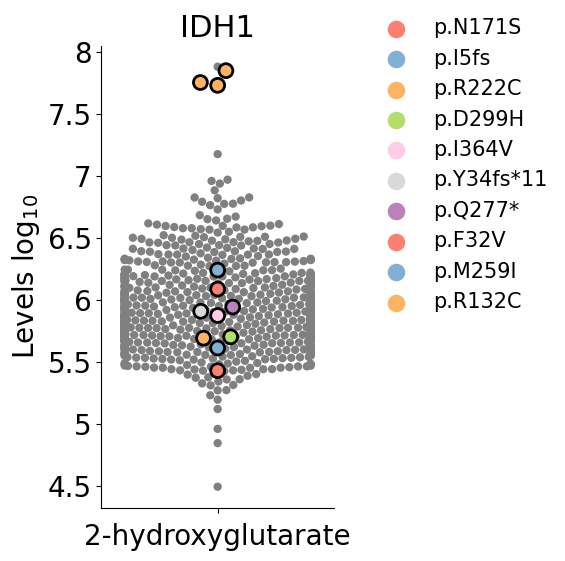

In [119]:
querygenemetabolite("IDH1")

          MutationAA
ID                  
CW2      p.T146fs*15
RL952        p.D446H
KMM1         p.Q359H
JHUEM1       p.V403M
SNU5         p.V403L
SNU1066       p.Q64H
SNU1040  p.D200fs*72
SW1088       p.H358R
RKO          p.G190D
SW1353       p.R172S
MOLT13           p.?
NCIH727  p.N136fs*25


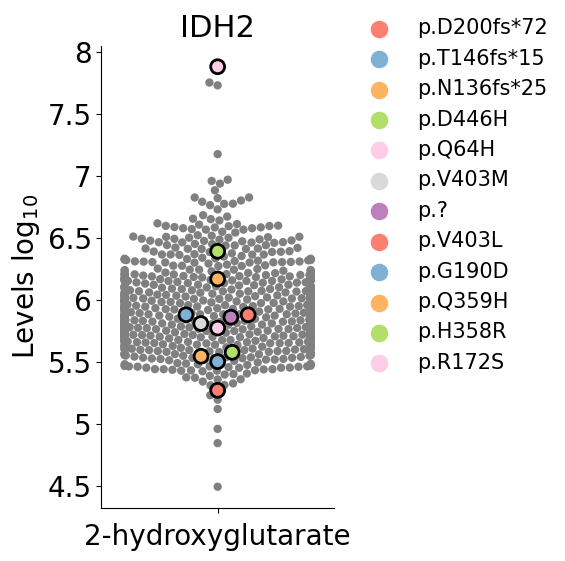

In [120]:
querygenemetabolite("IDH2")

         MutationAA
ID                 
SNGM        p.R195Q
SKUT1       p.S445L
TE6             p.?
CW2         p.A523V
CCK81       p.T656I
SKLU1       p.Q614E
MDAMB361    p.E240K
NCIH1092    p.R527L
CORL279      p.T87R
SNU1040     p.R312C
SNU175      p.G412D
NCIH23       p.A69T
A101D       p.R171H
RKO         p.P297S
EFO27       p.R210*
EFM19       p.V425L
RL              p.?
EN              p.?
LS411N          p.?
ESS1        p.K167R
TE11        p.K498R
LOXIMVI     p.D275H
ALLSIL      p.G434S
DND41       p.T308M
CMLT1       p.R261C
NALM6       p.D394E
CAL78       p.C438Y
BCPAP       p.M519I
HOP62       p.L318F


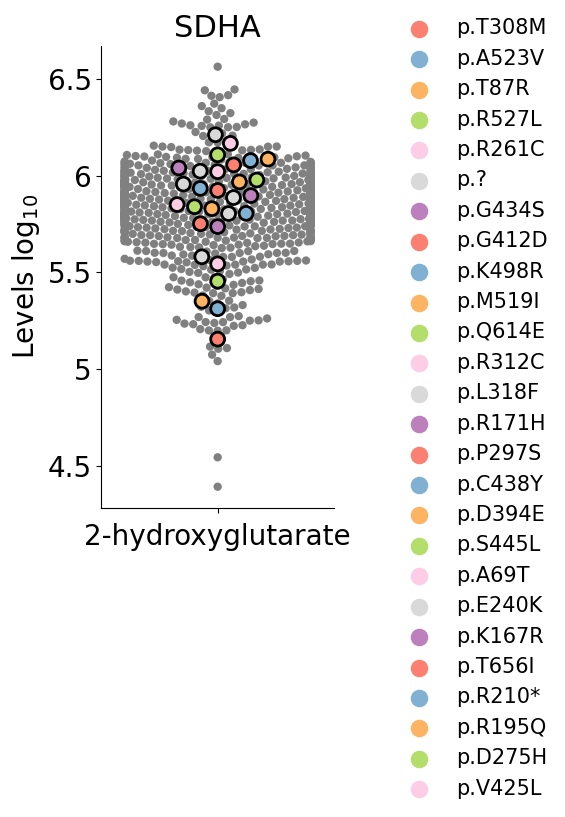

In [121]:
querygenemetabolite("SDHA", "succinate/methylmalonate")

         MutationAA
ID                 
NCIH2342    p.C253S
OSRC2       p.W218*
GCIY            p.?
253J       p.A262fs
253JBV     p.A262fs


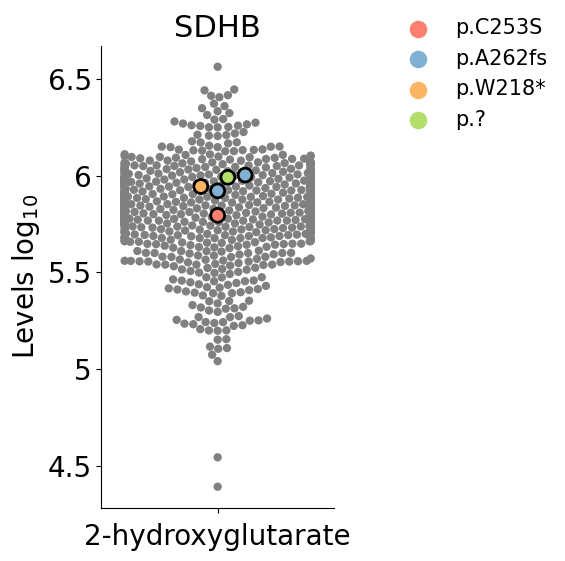

In [122]:
querygenemetabolite("SDHB", "succinate/methylmalonate")

         MutationAA
ID                 
5637         p.L63V
RL952        p.S19N
NCIH82       p.M87V
NCIH2110     p.P29L
NCIH1838     p.R50H


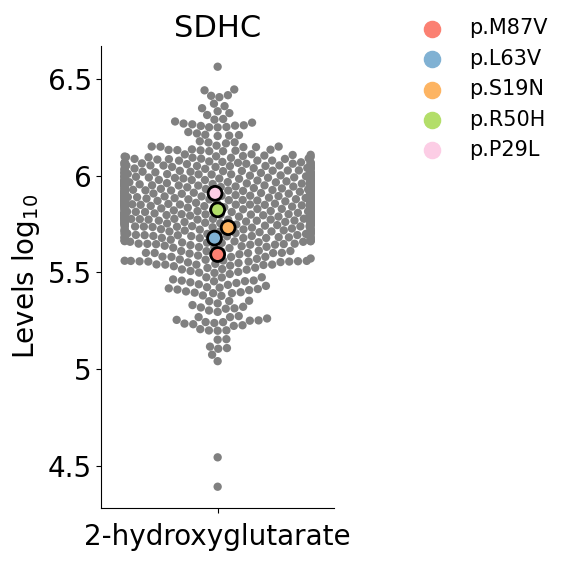

In [123]:
querygenemetabolite("SDHC", "succinate/methylmalonate")

     MutationAA
ID             
TE9      p.I40M
OE19     p.H30P


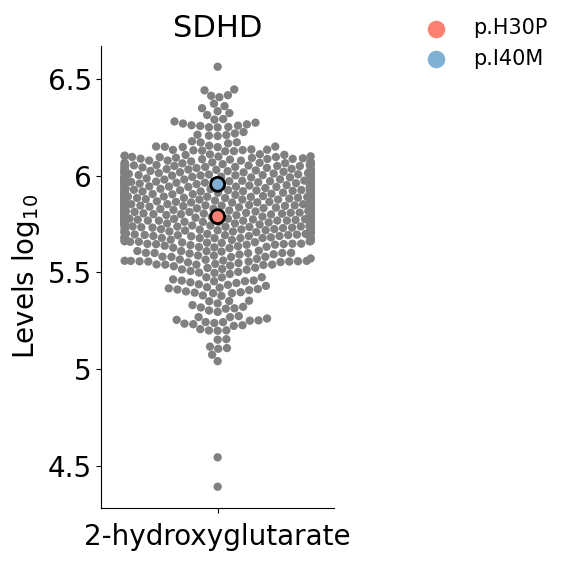

In [124]:
querygenemetabolite("SDHD", "succinate/methylmalonate")

         MutationAA
ID                 
MSTO211H     p.M13L
MDAMB157     p.R18G
EN           p.E73G


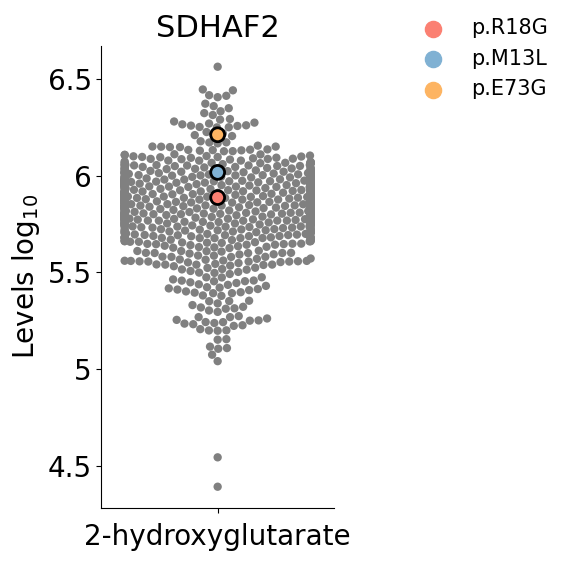

In [125]:
querygenemetabolite("SDHAF2", "succinate/methylmalonate")

         MutationAA
ID                 
SNUC2A      p.A226T
SH4             p.?
TE8         p.T285A
KYSE410         p.?
SNU16       p.A299V
KYSE520     p.T285A
NCIH1355    p.M259I
WM983B      p.R343*
SNU81       p.K311T
SNU1040     p.M454V
HEC59        p.R87H
NCIH1648    p.G144R
IGROV1       p.A45T
A549        p.G464V
KYSE70      p.P192S
EN          p.L214S
OVKATE      p.H204Y
IGR37       p.D219N
CAL54       p.I120V
BCPAP       p.I120V


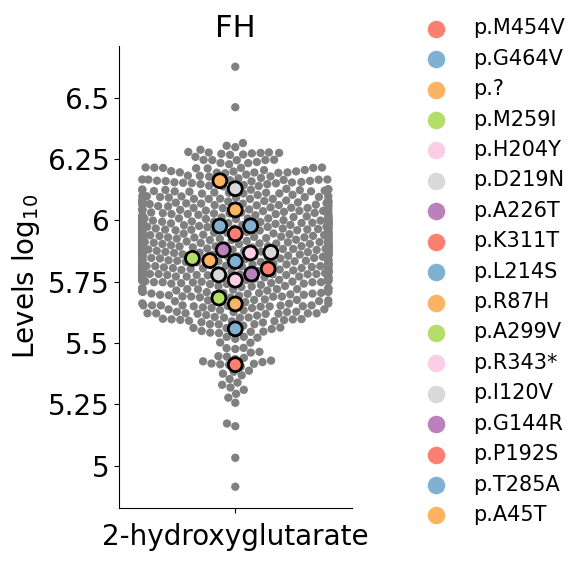

In [126]:
querygenemetabolite("FH", "fumarate/maleate/alpha-ketoisovalerate")

In [66]:
def querysuccfh_ratio(gene, label = "2-hydroxyglutarate"):
    # Get celline ids with a mutation (non silent)
    gene_of_interest = celllines_mutations[celllines_mutations["HGNC"] == gene]
    gene_of_interest = gene_of_interest[gene_of_interest["MutationType"] != "Silent"]
    gene_of_interest = gene_of_interest[gene_of_interest["MutationType"].notna()]
    gene_of_interest_celllines = set(gene_of_interest["CellLineName_Cellosaurus"])
    
    
    ## Get the cell lines with mutations
    cellines_with_mutation = celllines_mapped_mutations[celllines_mapped_mutations["ID"].isin(gene_of_interest_celllines)]["ID"].tolist()
    cellines_without_mutation = celllines_mapped_mutations[~celllines_mapped_mutations["ID"].isin(gene_of_interest_celllines)]["ID"].tolist()
#    cellines_with_mutation = list(set([str(x) for x in cellines_with_mutation]))
#    cellines_without_mutation = list(set([str(x) for x in cellines_without_mutation]))
    
    cellines_with_mutation = [str(x) for x in cellines_with_mutation]
    cellines_without_mutation = [str(x) for x in cellines_without_mutation]
  
    
    mutationdict = dict(zip(gene_of_interest["CellLineName_Cellosaurus"],gene_of_interest["AA_Mutation"]))
    celllines_mutated = celllines_mapped_mutations[celllines_mapped_mutations["ID"].isin(gene_of_interest_celllines)]
    mutation_aa = celllines_mutated["ID"].map(mutationdict)

    ## Get the metabolomics data
    mutated_celllines = averaged[cellines_with_mutation].transpose()
    nonmutated_celllines = averaged[cellines_without_mutation].transpose()
    
    mutated_celllines["Mutation"] = 1
    mutated_celllines["MutationAA"] = mutation_aa.values
    print(mutated_celllines[["MutationAA"]].drop_duplicates())
    nonmutated_celllines["Mutation"] = 0
    nonmutated_celllines["MutationAA"] = "WT"
    
    celllines_labeled = pd.concat([mutated_celllines, nonmutated_celllines])
    celllines_labeled.index = celllines_labeled.index.map(str)
    
    celllines_mapped_mutations[celllines_mapped_mutations["ID"].isin(gene_of_interest_celllines)]["ID"].unique()
    
#    gene_ranked = celllines_labeled.sort_values(by =metabolite).reset_index()
    celllines_labeled["S_F_ratio"] = celllines_labeled["succinate/methylmalonate"]/celllines_labeled["fumarate/maleate/alpha-ketoisovalerate"]
    gene_ranked = celllines_labeled.sort_values(by ="S_F_ratio")

        
    gene_ranked["index"] = gene_ranked.index
    mutationonly = gene_ranked[gene_ranked["Mutation"] == 1].drop_duplicates(subset = "ID")
    nomutation = gene_ranked[gene_ranked["Mutation"] == 0].drop_duplicates(subset = "ID")
        
    matplotlib.rcParams['figure.figsize'] = [3, 6]
    palette = sns.color_palette("Set3", 10)[3:]
    
    g1 = sns.swarmplot(y= (nomutation["S_F_ratio"]), color = "grey", zorder =1, size = 6)
    g = sns.swarmplot(y= (mutationonly["S_F_ratio"]), size = 10, hue = mutationonly["MutationAA"],
                  palette = palette, edgecolor = "k", linewidth= 2, zorder = 3, x=[""]*len(mutationonly))

    sns.despine()

    g.set_ylabel("Levels log$_{10}$", size = 20)
    #g.set_yticks([4, 4.5,5,5.5])
    g.set_yticklabels(g.get_yticks(), size = 20)
    g.yaxis.set_major_formatter(FormatStrFormatter('%g'))

    g.set_xlabel(label, size = 20)
    g.set_title(gene, size = 22)
    g.legend(prop={"size":15}, frameon = False, markerscale = 1.5, bbox_to_anchor=(1.5, 0.6, 0.5, 0.5))
    savename = gene + "_" + label + "_averaged_succinatefumarateratio.png"
    #plt.savefig(savename, dpi = 400, bbox_inches = "tight")
    plt.show()

      MutationAA
ID              
A101D    p.R171H
RKO      p.P297S
RL           p.?


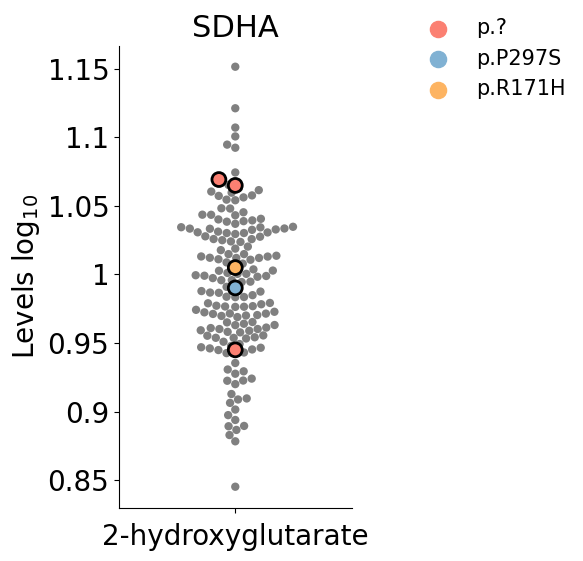

In [67]:
querysuccfh_ratio("SDHA")

     MutationAA
ID             
OE19     p.H30P


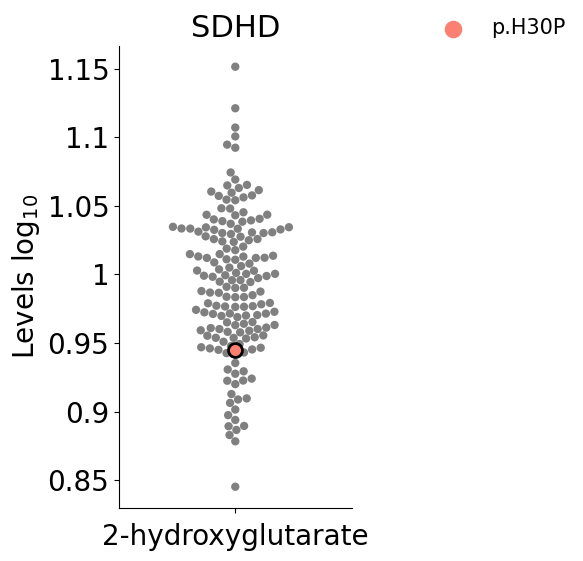

In [74]:
querysuccfh_ratio("SDHD")

   MutationAA
ID           
EN     p.E73G


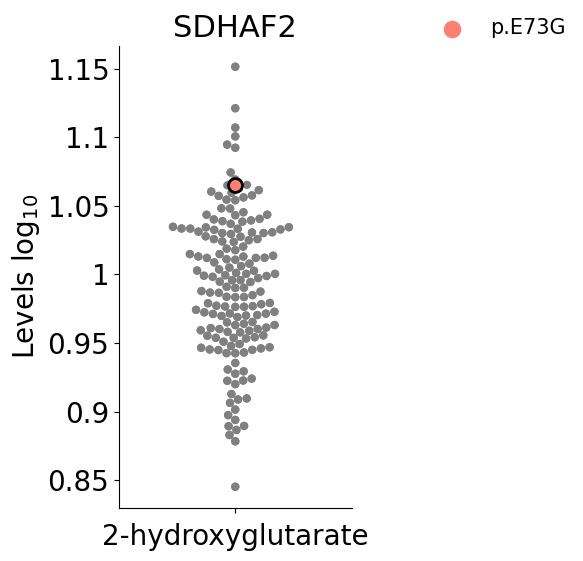

In [77]:
querysuccfh_ratio("SDHAF2")

No handles with labels found to put in legend.


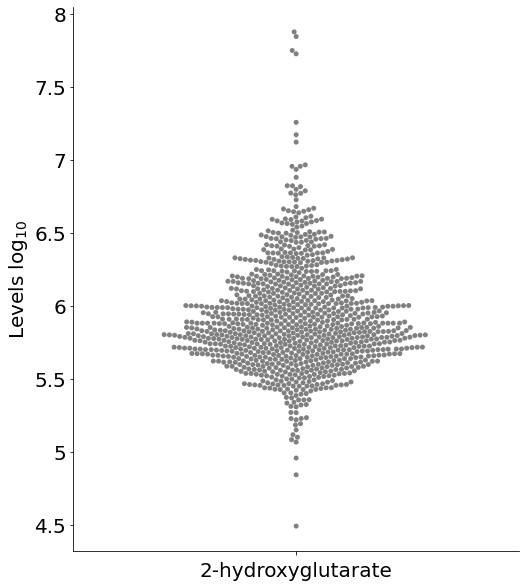

In [14]:
g = sns.swarmplot(y= metabolomics["2-hydroxyglutarate"], color = "grey", zorder =1)
sns.despine()

g.set_ylabel("Levels log$_{10}$", size = 20)
    #g.set_yticks([4, 4.5,5,5.5])
g.set_yticklabels(g.get_yticks(), size = 20)
g.yaxis.set_major_formatter(FormatStrFormatter('%g'))

g.set_xlabel("2-hydroxyglutarate", size = 20)
g.legend(prop={"size":15}, frameon = False, markerscale = 1.5)

plt.savefig("2-hydroxyglutarate_distribution.pdf")

No handles with labels found to put in legend.


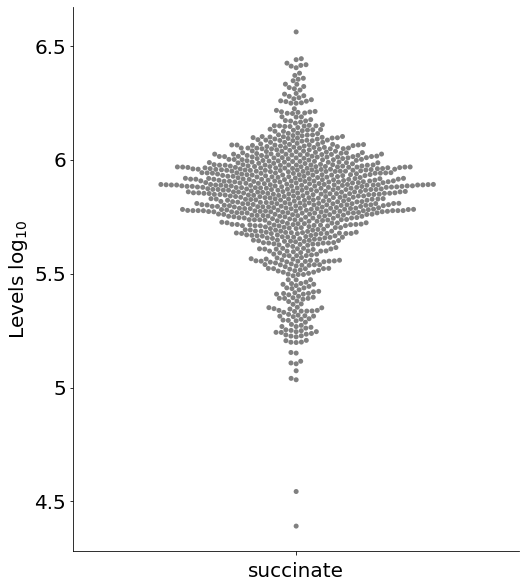

In [16]:
g = sns.swarmplot(y= metabolomics["succinate/methylmalonate"], color = "grey", zorder =1)
sns.despine()

g.set_ylabel("Levels log$_{10}$", size = 20)
    #g.set_yticks([4, 4.5,5,5.5])
g.set_yticklabels(g.get_yticks(), size = 20)
g.yaxis.set_major_formatter(FormatStrFormatter('%g'))

g.set_xlabel("succinate", size = 20)
g.legend(prop={"size":15}, frameon = False, markerscale = 1.5)

plt.savefig("succinate_distribution.pdf")

No handles with labels found to put in legend.


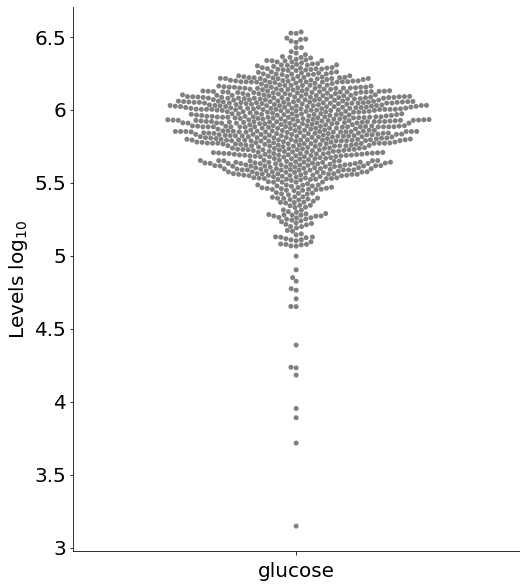

In [19]:
g = sns.swarmplot(y= metabolomics["UDP-galactose/UDP-glucose"], color = "grey", zorder =1)
sns.despine()

g.set_ylabel("Levels log$_{10}$", size = 20)
    #g.set_yticks([4, 4.5,5,5.5])
g.set_yticklabels(g.get_yticks(), size = 20)
g.yaxis.set_major_formatter(FormatStrFormatter('%g'))

g.set_xlabel("glucose", size = 20)
g.legend(prop={"size":15}, frameon = False, markerscale = 1.5)

plt.savefig("glucose_distribution.pdf")

No handles with labels found to put in legend.


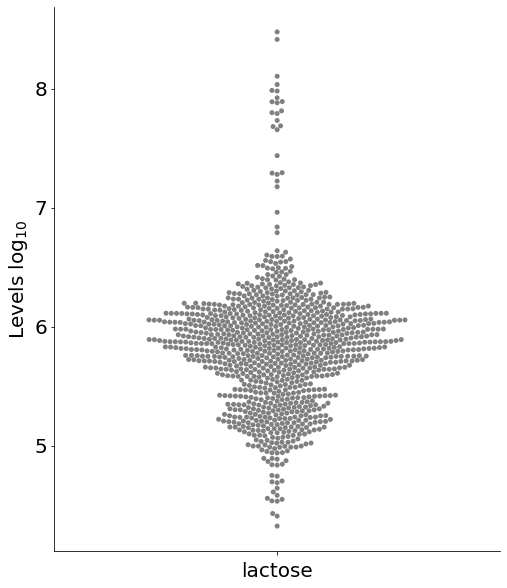

In [20]:
g = sns.swarmplot(y= metabolomics["lactose"], color = "grey", zorder =1)
sns.despine()

g.set_ylabel("Levels log$_{10}$", size = 20)
    #g.set_yticks([4, 4.5,5,5.5])
g.set_yticklabels(g.get_yticks(), size = 20)
g.yaxis.set_major_formatter(FormatStrFormatter('%g'))

g.set_xlabel("lactose", size = 20)
g.legend(prop={"size":15}, frameon = False, markerscale = 1.5)

plt.savefig("lactose_distribution.pdf")